In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, callbacks, utils
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset, shuffle the files and split them into batches of 32 images. The API automaically splits the datasets into tuples of input and label.
train, test = tfds.load('emnist/letters', split=['train', 'test'], shuffle_files=True, batch_size=32, as_supervised=True, data_dir="/content/drive/MyDrive/Colab Notebooks/")

length_train = train.reduce(0, lambda x, _: x + 1)
length_test = test.reduce(0, lambda x, _: x + 1)

print(f"Train size {length_train}, test size: {length_test}")

# Scale the image values to a scale between 0 and 1
train = train.map(lambda image,label : (tf.transpose(image,[0,2,1,3])/255,tf.one_hot(label,int(26))))
test = test.map(lambda image,label : (tf.transpose(image,[0,2,1,3])/255,tf.one_hot(label,int(26))))

Train size 2775, test size: 463


In [ ]:
# Explore the labels of the data
for batch in train.take(1):
    print([np.argmax(i) for i in batch[1]])
    print(batch[0].shape)

[25, 7, 25, 11, 10, 4, 4, 24, 7, 18, 4, 25, 22, 2, 4, 13, 16, 14, 21, 11, 11, 18, 23, 18, 19, 8, 16, 15, 24, 15, 14, 10]
(32, 28, 28, 1)


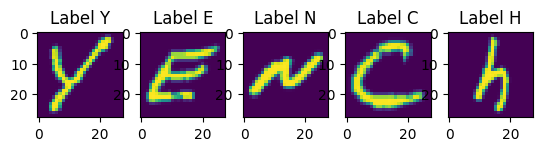

In [ ]:
# Plot 5 images as samples with their corresponding labels to explore the dataset a little

def label_to_letter(letterno):
    return chr(64+tf.argmax(letterno))
    #print(letterno.numpy())
    #chr(letterno.numpy()+64)

fig, axs = plt.subplots(1,5)
for i in enumerate(train.take(5)):
    batch = i[1]
    images = batch[0]
    labels = batch[1]

    axs[i[0]].imshow(images[0])
    axs[i[0]].set_title(f"Label {label_to_letter(labels[0])}")

In [ ]:
def visualise_conv_kernerls(model, n_conv_layers, shape):
  # A function to plot the convolution kernels of the model after training
  fig,axs = plt.subplots(1,n_conv_layers)
  if n_conv_layers > 1:
    for i in range(n_conv_layers):
      axs[i].imshow(model.layers[i].get_weights()[0].reshape(shape))
      axs[i].set_title(f"Convolution kernel {i+1}")
  else:
    axs.imshow(model.layers[0].get_weights()[0].reshape(shape))
    axs.set_title(f"Convolution kernel {int(1)}")

In [ ]:
def plot_learning_curve(history, metric, loss, title="Learning and loss curves for the model"):
  # A function to plot the learning curves
  fig,axs = plt.subplots(1,2)
  axs[0].plot(history.history[metric], label=f"Tarining {metric}")
  axs[0].plot(history.history[f'val_{metric}'], label=f"Validation {metric}")
  axs[0].set_title(f"Accuracy ({metric}):")
  axs[0].legend()
  axs[0].grid()

  axs[1].plot(history.history['loss'], label=f"Training loss ({loss})")
  axs[1].plot(history.history[f'val_loss'], label=f"Validation ({loss})")
  axs[1].set_title(f"Loss ({loss}):")
  axs[1].legend()
  axs[1].grid()

  fig.set_size_inches(15, 5)
  fig.suptitle(title)

Train 9 models with varying numbers of layers and neurons per each layer.

In [ ]:
lrning_rate = 0.01 # the learning rate used globally in the notebook


In [ ]:
# Create 3*3 = 9 models with different layer and neuron counts
all_models = None
all_models = []

for n_layers in [1,2,3]:
  for n_neurons in [8, 17, 26]:
    layer_info = (n_layers, n_neurons)
    print(layer_info)

    hidden_layers = [layers.Dense(units=n_neurons, activation='relu') for _ in range(n_layers)]
    print(hidden_layers)



    model_layers_neurons = models.Sequential()
    model_layers_neurons.add(layers.Flatten(input_shape=(28, 28, 1)))

    for hidden_layer in [layers.Dense(n_neurons) for _ in range(n_layers)]:
      model_layers_neurons.add(hidden_layer)
      model_layers_neurons.add(tf.keras.layers.LeakyReLU(alpha=0.1)) # Use leaky relu insted of rely

    model_layers_neurons.add(layers.Dense(26))
    model_layers_neurons.add(tf.keras.layers.LeakyReLU(alpha=0.1))
    # Add the input layer which flattens the 28 by 28 images into an array of length 784,
    # Add n_layers hidden layers each with n_neurons
    # Add the final output layer with 26 neurons for 26 different categores
    model_layers_neurons.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lrning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['categorical_accuracy'])
    print(f"Summary for model with {n_layers} layers and {n_neurons} neurons/layer")
    #model_layers_neurons.summary()

    all_models.append((model_layers_neurons, layer_info))

(1, 8)
Summary for model with 1 layers and 8 neurons/layer
(1, 17)
Summary for model with 1 layers and 17 neurons/layer
(1, 26)
Summary for model with 1 layers and 26 neurons/layer
(2, 8)
[<keras.src.layers.core.dense.Dense object at 0x7e6bc012f4f0>, <keras.src.layers.core.dense.Dense object at 0x7e6bc01c9390>]
Summary for model with 2 layers and 8 neurons/layer
(2, 17)
[<keras.src.layers.core.dense.Dense object at 0x7e6bc01d8f10>, <keras.src.layers.core.dense.Dense object at 0x7e6bc01d8d60>]
Summary for model with 2 layers and 17 neurons/layer
(2, 26)
[<keras.src.layers.core.dense.Dense object at 0x7e6bb2706b00>, <keras.src.layers.core.dense.Dense object at 0x7e6bb2706cb0>]
Summary for model with 2 layers and 26 neurons/layer
(3, 8)
[<keras.src.layers.core.dense.Dense object at 0x7e6bc01d8e20>, <keras.src.layers.core.dense.Dense object at 0x7e6bb272de10>, <keras.src.layers.core.dense.Dense object at 0x7e6bb272d990>]
Summary for model with 3 layers and 8 neurons/layer
(3, 17)
[<keras.s

In [ ]:
# Train the newly created models with 10 epochs each
n_epochs = 30
training_histories = None
training_histories = list()

for model_ij, model_info in all_models:
  layer_count = model_info[0]
  neuron_count = model_info[1]

  print(f"Training model with {layer_count} hidden layers and {neuron_count} neurons/layer")

  ckpt_path_modelij = f"/content/drive/MyDrive/Colab Notebooks/candidate_models/cp_{layer_count}_layers_{neuron_count}_neurons-"+"{epoch:04d}.ckpt"

  cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=ckpt_path_modelij,
                                                   save_weights_only=True,
                                                   verbose=1
                                                   )

  history_ij = model_ij.fit(
    train,
    validation_data=test,
    epochs=n_epochs,
    callbacks=[cp_callback])
  training_histories.append((history_ij,model_info))

9


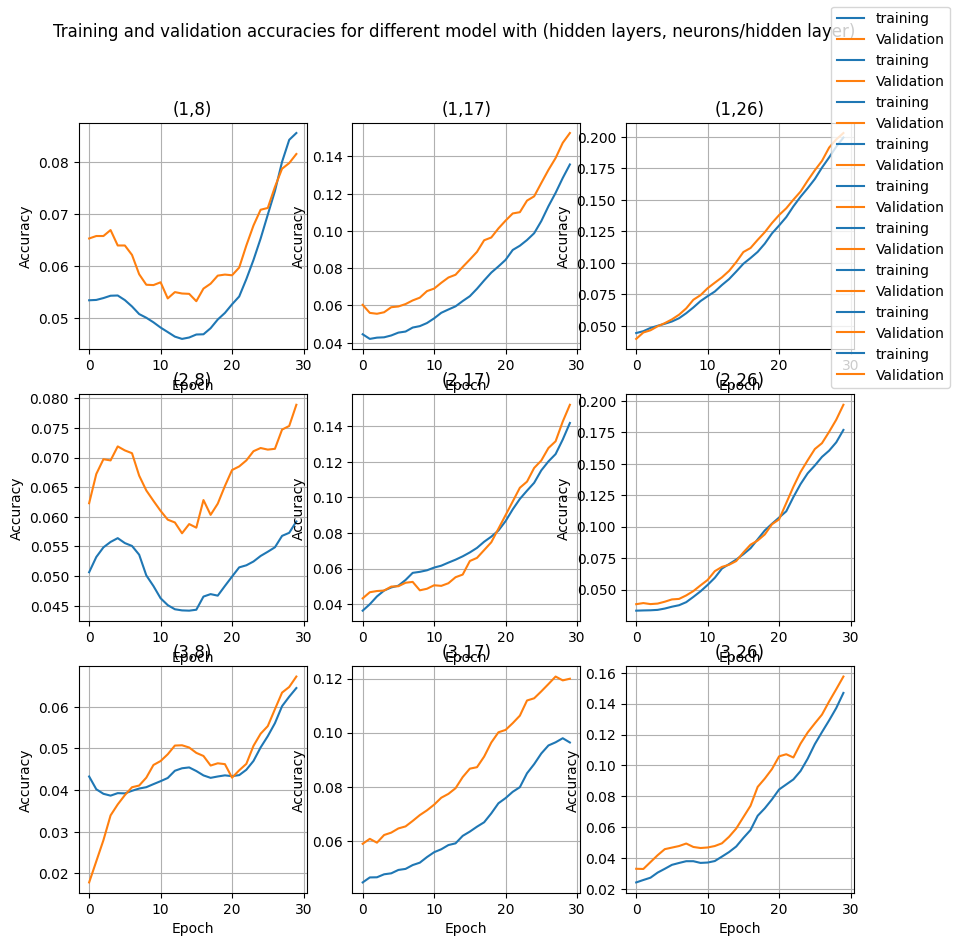

In [ ]:
# Plot the accuracies
print(len(training_histories))
fig, axes = plt.subplots(3,3)
for hist, model_info in training_histories:
    layers_count = model_info[0]
    neurons = model_info[1]
    columns = dict({
        8 : 0,
        17 : 1,
        26 : 2,
        35 : 3
    })
    subplot = axes[layers_count-1][columns[neurons]]
    subplot.plot(hist.history['categorical_accuracy'], label="training")
    subplot.plot(hist.history['val_categorical_accuracy'], label="Validation")

    subplot.set_title(f"({layers_count},{neurons})")
    subplot.grid()

    subplot.set_xlabel("Epoch")
    subplot.set_ylabel("Accuracy")


fig.suptitle("Training and validation accuracies for different model with (hidden layers, neurons/hidden layer)")
fig.set_size_inches(10, 10)
fig.legend()
# The graph with 3 layers and 26 neurons looks very promising, the curve is rather stable and keeps increasig to the very end

In [ ]:
model_l2_n26 = None
model_l2_n26 = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(30, activation="softmax"),
    layers.Dense(30, activation="softmax"),
    layers.Dense(26, activation="softmax"),
])

model_l2_n26.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lrning_rate),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['categorical_accuracy']
)
model_l2_n26.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_51 (Dense)            (None, 30)                23550     
                                                                 
 dense_52 (Dense)            (None, 30)                930       
                                                                 
 dense_53 (Dense)            (None, 26)                806       
                                                                 
Total params: 25286 (98.77 KB)
Trainable params: 25286 (98.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history_model_l2_n26 = None
history_model_l2_n26 = model_l2_n26.fit(
    train,
    validation_data=test,
    epochs=60,
    callbacks=[tf.keras.callbacks.ModelCheckpoint(filepath="/content/drive/MyDrive/leakyReLu_l2_n26/cp_{epoch:04d}.ckpt", save_weights_only=True, verbose=1)]
)

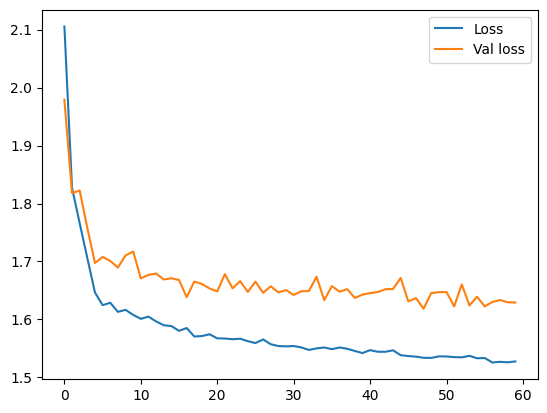

In [ ]:
plt.plot(history_model_l2_n26.history['loss'], label="Loss")
plt.plot(history_model_l2_n26.history['val_loss'], label="Val loss")
plt.legend()

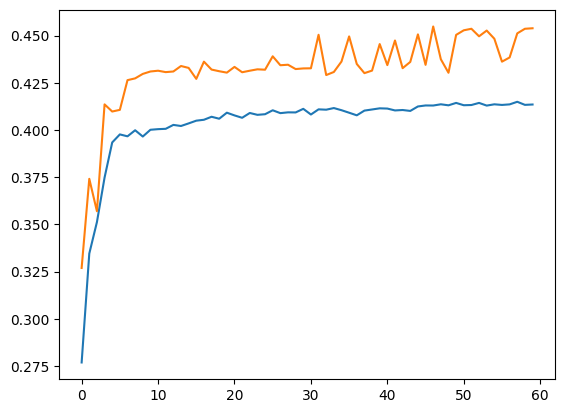

In [ ]:
plt.plot(history_model_l2_n26.history['categorical_accuracy'], label="Categorical accuracy")
plt.plot(history_model_l2_n26.history['val_categorical_accuracy'], label="Val categorical accuracy")

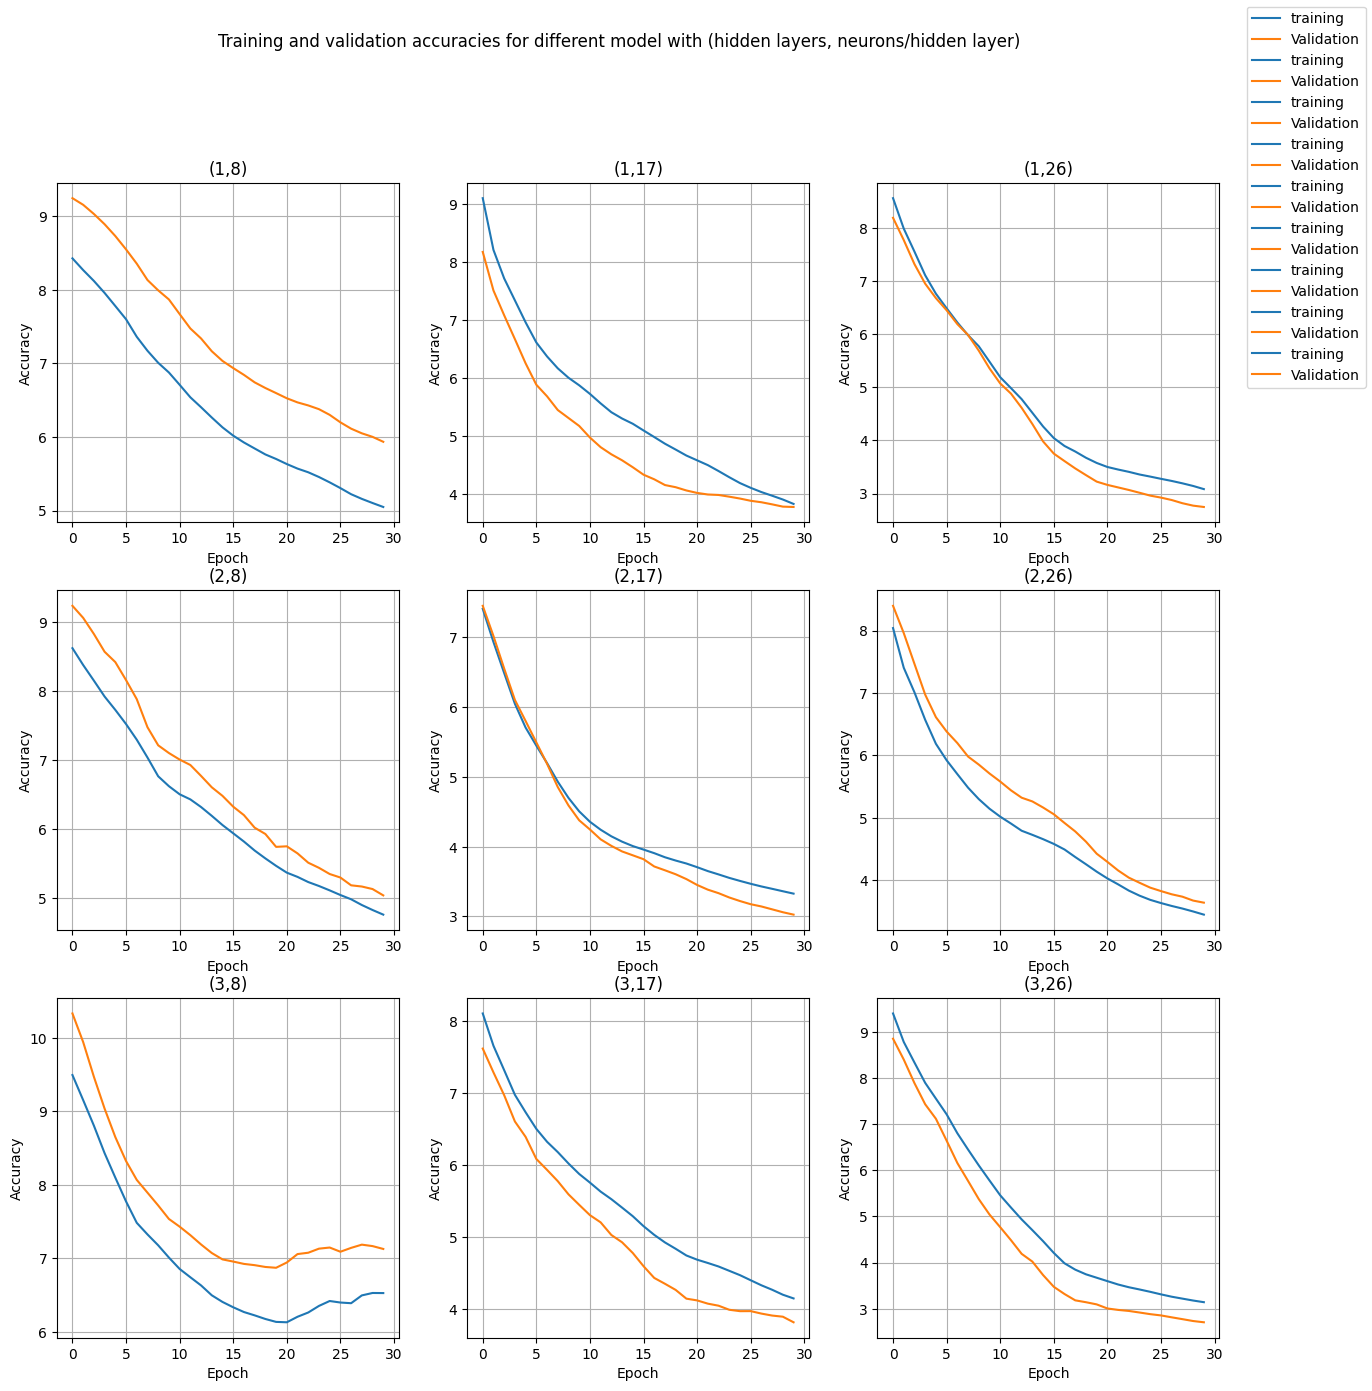

In [ ]:
# Plot the losses
fig, axes = plt.subplots(3,3)
for hist, model_info in training_histories:
    layers_count = model_info[0]
    neurons = model_info[1]
    columns = dict({
        8 : 0,
        17 : 1,
        26 : 2,
        35 : 3
    })
    subplot = axes[layers_count-1][columns[neurons]]
    subplot.plot(hist.history['loss'], label="training")
    subplot.plot(hist.history['val_loss'], label="Validation")

    subplot.set_title(f"({layers_count},{neurons})")
    subplot.grid()

    subplot.set_xlabel("Epoch")
    subplot.set_ylabel("Accuracy")


fig.suptitle("Training and validation accuracies for different model with (hidden layers, neurons/hidden layer)")
fig.set_size_inches(10, 10)
fig.legend()

In [ ]:
# Based on the previous cell, we can conclude that 1 hidden layers with 26 neurons each is most likely the best network structure for this problem
# Now we need to figure out a good number of convolution lauyers to use
the_models = None
the_models = []
neurons_per_layer = 26

for i in [1,2,3]:
  model_i = models.Sequential()
  conv_layers = [layers.Conv2D(3,(3,3),input_shape=(28,28,1), activation="relu") for _ in range(i)] # Add a convolution layer w/ three 3x3 kernels
  for conv_layer in conv_layers:
    model_i.add(conv_layer)
    model_i.add(layers.MaxPooling2D((2, 2)))

  model_i.add(layers.Flatten(input_shape=(28, 28, 1)))
  # Add three hidden layers w/ 8 neurons
  model_i.add(layers.Dense(units=neurons_per_layer, activation='relu'))
  #model_i.add(layers.Dense(units=neurons_per_layer, activation='relu'))
  #model_i.add(layers.Dense(units=neurons_per_layer, activation='relu'))
  model_i.add(layers.Dense(26, activation='relu'))

  the_models.append((model_i, i))

  model_i.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lrning_rate),
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=['categorical_accuracy'])
  model_i.summary()

In [ ]:
# Train these models w/ different counts of conv layers
training_histories_conv = list()
for model, conv_layer_count in the_models:
  print(f"Training the model with {conv_layer_count} conv layers")
  hist = model.fit(train, validation_data=test, epochs=30)
  training_histories_conv.append((hist, conv_layer_count))

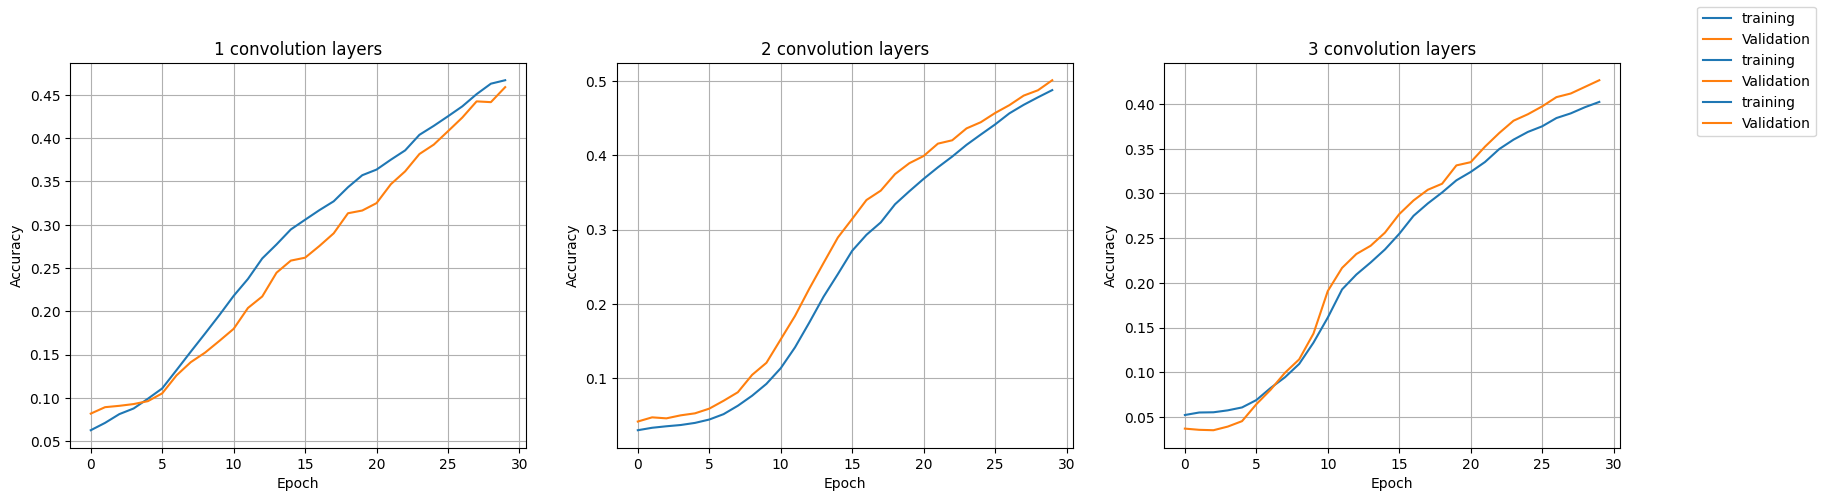

In [ ]:
# Plot the accuracies
fig, axs = plt.subplots(1,3)
for hist, conv_layer_n in training_histories_conv:
  subplot = axs[conv_layer_n-1]
  subplot.plot(hist.history['categorical_accuracy'], label="training")
  subplot.plot(hist.history['val_categorical_accuracy'], label="Validation")

  subplot.set_title(f"{conv_layer_n} convolution layers")
  subplot.grid()

  subplot.set_xlabel("Epoch")
  subplot.set_ylabel("Accuracy")

fig.set_size_inches(20, 5)
fig.legend()

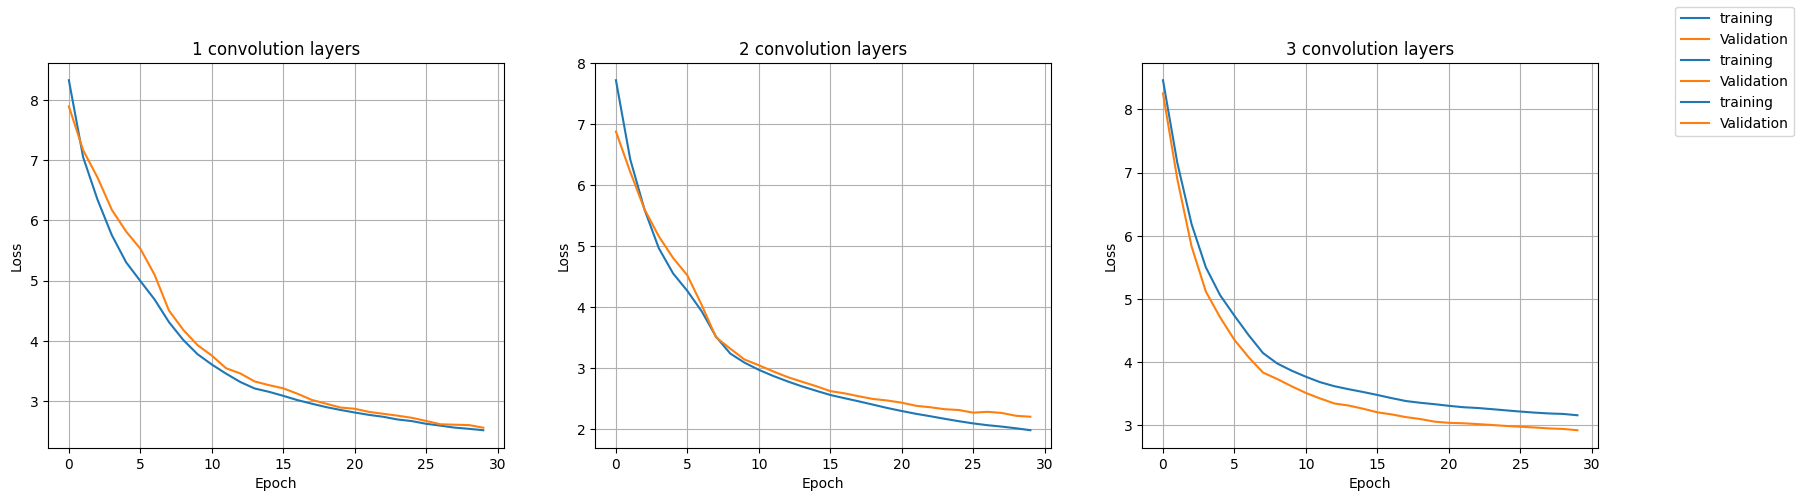

In [ ]:
# Plot the losses
fig, axs = plt.subplots(1,3)
for hist, conv_layer_n in training_histories_conv:
  subplot = axs[conv_layer_n-1]
  subplot.plot(hist.history['loss'], label="training")
  subplot.plot(hist.history['val_loss'], label="Validation")

  subplot.set_title(f"{conv_layer_n} convolution layers")
  subplot.grid()

  subplot.set_xlabel("Epoch")
  subplot.set_ylabel("Loss")

fig.set_size_inches(20, 5)
fig.legend()

Define a model with 2 convolution layers, each with 3 filters of shape (3,3). This model does not have any pooling layers.

The learning rate used was 5e-6.

In [ ]:
# It seems that the best model for our purpose is a CNN with 2 convolutional layers and three hidden layers w/ 8 neurons each
final_model_no_pooling = None
final_model_no_pooling = models.Sequential([
    layers.Conv2D(26,(3,3),input_shape=(28,28,1), activation="softmax"),
    #layers.Conv2D(3,(3,3),input_shape=(28,28,1), activation="softmax"),
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(units=60, activation='softmax'),
    layers.Dense(26, activation='softmax')
])
final_model_no_pooling.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # Using an even smaller learning rate
               loss=tf.keras.losses.CategoricalCrossentropy(),
               metrics=['categorical_accuracy'])
final_model_no_pooling.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 26)        260       
                                                                 
 flatten_16 (Flatten)        (None, 17576)             0         
                                                                 
 dense_62 (Dense)            (None, 60)                1054620   
                                                                 
 dense_63 (Dense)            (None, 26)                1586      
                                                                 
Total params: 1056466 (4.03 MB)
Trainable params: 1056466 (4.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Source for the callback https://www.tensorflow.org/tutorials/keras/save_and_load
# Train the model with 30 epochs

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath="/content/drive/MyDrive/Colab Notebooks/final_model_no_pooling_smallerrate/cp-{epoch:04d}.ckpt",
                                                 save_weights_only=True,
                                                 verbose=1,
                                                 save_freq=2775*10
                                                 )
history_no_pooling = None
history_no_pooling = final_model_no_pooling.fit(
    train,
    validation_data=test,
    epochs=30,
    callbacks=[cp_callback])

Epoch 1/30
2775/2775 [==============================] - 85s 31ms/step - loss: 2.8582 - categorical_accuracy: 0.1986 - val_loss: 2.9800 - val_categorical_accuracy: 0.1582
Epoch 2/30
2256/2775 [=======================>......] - ETA: 15s - loss: 2.8458 - categorical_accuracy: 0.1964

In [ ]:
# Train further for 15 more epochs
history_no_pooling_plus30_epochs = final_model_no_pooling.fit(
    train,
    validation_data=test,
    epochs=30+15,
    initial_epoch=30,
    callbacks=[cp_callback])

Epoch 31/45
2775/2775 [==============================] - ETA: 0s - loss: 2.7124 - categorical_accuracy: 0.3783
Epoch 31: saving model to /content/drive/MyDrive/Colab Notebooks/final_model_no_pooling_smallerrate/cp-0031.ckpt
2775/2775 [==============================] - 62s 22ms/step - loss: 2.7124 - categorical_accuracy: 0.3783 - val_loss: 2.9554 - val_categorical_accuracy: 0.3878
Epoch 32/45
2774/2775 [============================>.] - ETA: 0s - loss: 2.6943 - categorical_accuracy: 0.3878
Epoch 32: saving model to /content/drive/MyDrive/Colab Notebooks/final_model_no_pooling_smallerrate/cp-0032.ckpt
2775/2775 [==============================] - 52s 19ms/step - loss: 2.6942 - categorical_accuracy: 0.3877 - val_loss: 2.9465 - val_categorical_accuracy: 0.3982
Epoch 33/45
2774/2775 [============================>.] - ETA: 0s - loss: 2.6762 - categorical_accuracy: 0.3954
Epoch 33: saving model to /content/drive/MyDrive/Colab Notebooks/final_model_no_pooling_smallerrate/cp-0033.ckpt
2775/2775 

In [ ]:
# Train it again for 15 more epochs
history_no_pooling_plus15_epochs = final_model_no_pooling.fit(
    train,
    validation_data=test,
    epochs=45+15,
    initial_epoch=45,
    callbacks=[cp_callback])

Epoch 46/60
2775/2775 [==============================] - ETA: 0s - loss: 2.4580 - categorical_accuracy: 0.4777
Epoch 46: saving model to /content/drive/MyDrive/Colab Notebooks/final_model_no_pooling_smallerrate/cp-0046.ckpt
2775/2775 [==============================] - 47s 17ms/step - loss: 2.4580 - categorical_accuracy: 0.4777 - val_loss: 2.7669 - val_categorical_accuracy: 0.4896
Epoch 47/60
2774/2775 [============================>.] - ETA: 0s - loss: 2.4421 - categorical_accuracy: 0.4822
Epoch 47: saving model to /content/drive/MyDrive/Colab Notebooks/final_model_no_pooling_smallerrate/cp-0047.ckpt
2775/2775 [==============================] - 53s 19ms/step - loss: 2.4420 - categorical_accuracy: 0.4822 - val_loss: 2.7535 - val_categorical_accuracy: 0.4863
Epoch 48/60
2775/2775 [==============================] - ETA: 0s - loss: 2.4285 - categorical_accuracy: 0.4844
Epoch 48: saving model to /content/drive/MyDrive/Colab Notebooks/final_model_no_pooling_smallerrate/cp-0048.ckpt
2775/2775 

Text(0.5, 0.98, 'Model with convolution layers without pooling')

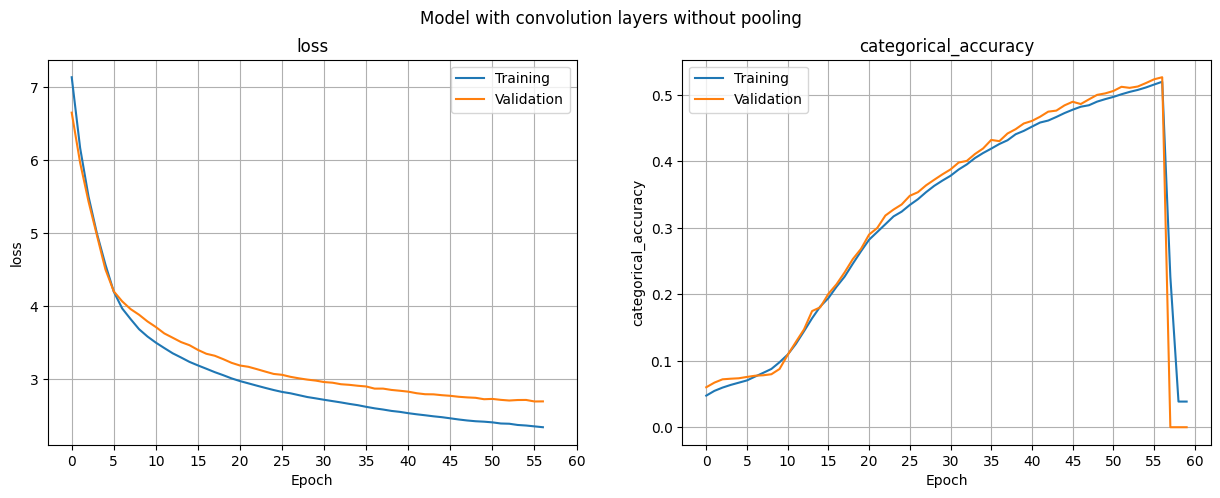

In [ ]:
figure_final_model_no_pooling, axs = plt.subplots(1,2)


for subplot, metric in zip(axs, ['loss', 'categorical_accuracy']):
  total_history_training = history_no_pooling.history[metric] + history_no_pooling_plus30_epochs.history[metric] + history_no_pooling_plus15_epochs.history[metric]
  total_history_validation = history_no_pooling.history[f"val_{metric}"] + history_no_pooling_plus30_epochs.history[f"val_{metric}"] + history_no_pooling_plus15_epochs.history[f"val_{metric}"]

  subplot.plot(total_history_training, label="Training")
  subplot.plot(total_history_validation, label="Validation")

  subplot.set_xlabel("Epoch")
  subplot.set_ylabel(metric)

  subplot.legend()

  subplot.set_title(f"{metric}")
  subplot.set_xticks([i for i in range(0,65,5)])
  #subplot.set_yticks([i for i in range(0,65,5)])

  subplot.grid()

figure_final_model_no_pooling.set_size_inches(15,5)
figure_final_model_no_pooling.suptitle("Model with convolution layers without pooling")

# The loss drops to nan (or diverges) at epoch 57
# Epoch 57: saving model to /content/drive/MyDrive/Colab Notebooks/final_model_no_pooling_smallerrate/cp-0057.ckpt

In [ ]:
# Load the trained model at epoch 57, because after that the loss drops to nan, which meand that after epoch 57 the model is unusable
final_cnn = None
final_cnn = models.Sequential([
    layers.Conv2D(3,(3,3),input_shape=(28,28,1), activation="relu"),
    layers.Conv2D(3,(3,3),input_shape=(28,28,1), activation="relu"),
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(units=26, activation='relu'),
    layers.Dense(26, activation='relu')
])
final_cnn.load_weights("/content/drive/MyDrive/Colab Notebooks/final_model_no_pooling_smallerrate/cp-0057.ckpt")
final_cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lrning_rate),
               loss=tf.keras.losses.CategoricalCrossentropy(),
               metrics=['categorical_accuracy'])
final_cnn.evaluate(test)

139/139 [==============================] - 1s 7ms/step - loss: 2.6904 - categorical_accuracy: 0.5266


[2.69040846824646, 0.526576578617096]

In [ ]:
def predict_from_file(file_path):
  kirjain = Image.open(file_path)
  a = np.array(kirjain)
  a_final = np.zeros((28,28,1))
  #print(a.shape)
  for i in range(28):
    for j in range(28):
      #a_final[i][j][0] = max(a[i][j])/255
      if max(a[i][j]) != 0:
        a_final[i][j][0] = 1
      else:
        a_final[i][j][0] = 0

  prediction = final_cnn.predict(np.array([a_final for _ in range(32)]))[0]
  predicted_letter = chr(np.argmax(prediction)+1 + 64)
  return predicted_letter, prediction

In [ ]:
letter, array = predict_from_file('/content/drive/MyDrive/piirrettyja_kuvia/piirretty_a.png')
for certainty, l in zip(array, [chr(i) for i in range(65,65+26)]):
  print(f"It is letter {l} with certainty: {certainty}")
print(f"The prediction is {letter}, while the actual letter is A")

letter, array = predict_from_file('/content/drive/MyDrive/piirrettyja_kuvia/piirrettu_e.png')
for certainty, l in zip(array, [chr(i) for i in range(65,65+26)]):
  print(f"It is letter {l} with certainty: {certainty}")
print(f"The prediction is {letter}, while the actual letter is E")

1/1 [==============================] - 0s 59ms/step
It is letter A with certainty: 0.0
It is letter B with certainty: 0.1930607706308365
It is letter C with certainty: 0.04022383689880371
It is letter D with certainty: 0.0
It is letter E with certainty: 0.0
It is letter F with certainty: 0.0
It is letter G with certainty: 0.013185093179345131
It is letter H with certainty: 0.17742794752120972
It is letter I with certainty: 0.16616183519363403
It is letter J with certainty: 0.0
It is letter K with certainty: 0.0
It is letter L with certainty: 0.04217047989368439
It is letter M with certainty: 0.0
It is letter N with certainty: 0.3645001947879791
It is letter O with certainty: 0.21934261918067932
It is letter P with certainty: 0.0
It is letter Q with certainty: 0.0
It is letter R with certainty: 0.0
It is letter S with certainty: 0.0
It is letter T with certainty: 0.0
It is letter U with certainty: 0.0
It is letter V with certainty: 0.021707531064748764
It is letter W with certainty: 0.0